# Exploratory Data Analysis

Libraries

In [64]:
import numpy as np 
import pandas as pd 
from sklearn.metrics import accuracy_score, classification_report 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import learning_curve
import joblib 
import seaborn as sns 
import warnings 
import matplotlib.pyplot as plt 

warnings.filterwarnings("ignore")

Load the Dataset

In [65]:
file_path = "hypertension_dataset.csv"
df = pd.read_csv(file_path)

Describe the dataset

In [66]:
df.describe()

,Age,BMI,Cholesterol,Systolic_BP,Diastolic_BP,Alcohol_Intake,Stress_Level,Salt_Intake,Sleep_Duration,Heart_Rate,LDL,HDL,Triglycerides,Glucose
count,174982.000000,174982.000000,174982.000000,174982.000000,174982.000000,174982.000000,174982.000000,174982.000000,174982.000000,174982.000000,174982.000000,174982.000000,174982.000000,174982.000000
mean,53.493319,27.494672,224.539335,134.505229,89.450315,14.991069,5.013041,8.482757,6.996468,74.495085,129.528271,64.573105,149.569836,134.488187
std,20.786353,7.213866,43.361589,26.019268,17.310789,8.652624,2.582341,3.750074,1.730731,14.438573,34.635795,20.190666,57.765006,37.526882
min,18.000000,15.000000,150.000000,90.000000,60.000000,0.000000,1.000000,2.000000,4.000000,50.000000,70.000000,30.000000,50.000000,70.000000
25%,36.000000,21.200000,187.000000,112.000000,74.000000,7.500000,3.000000,5.200000,5.500000,62.000000,100.000000,47.000000,100.000000,102.000000
50%,54.000000,27.500000,225.000000,135.000000,89.000000,15.000000,5.000000,8.500000,7.000000,74.000000,130.000000,65.000000,150.000000,134.000000
75%,71.000000,33.700000,262.000000,157.000000,104.000000,22.500000,7.000000,11.700000,8.500000,87.000000,160.000000,82.000000,200.000000,167.000000
max,89.000000,40.000000,299.000000,179.000000,119.000000,30.000000,9.000000,15.000000,10.000000,99.000000,189.000000,99.000000,249.000000,199.000000


In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174982 entries, 0 to 174981
Data columns (total 23 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Country                  174982 non-null  object 
 1   Age                      174982 non-null  int64  
 2   BMI                      174982 non-null  float64
 3   Cholesterol              174982 non-null  int64  
 4   Systolic_BP              174982 non-null  int64  
 5   Diastolic_BP             174982 non-null  int64  
 6   Smoking_Status           174982 non-null  object 
 7   Alcohol_Intake           174982 non-null  float64
 8   Physical_Activity_Level  174982 non-null  object 
 9   Family_History           174982 non-null  object 
 10  Diabetes                 174982 non-null  object 
 11  Stress_Level             174982 non-null  int64  
 12  Salt_Intake              174982 non-null  float64
 13  Sleep_Duration           174982 non-null  float64
 14  Hear

Checking Data Types

In [68]:
df.dtypes

Country                     object
Age                          int64
BMI                        float64
Cholesterol                  int64
Systolic_BP                  int64
Diastolic_BP                 int64
Smoking_Status              object
Alcohol_Intake             float64
Physical_Activity_Level     object
Family_History              object
Diabetes                    object
Stress_Level                 int64
Salt_Intake                float64
Sleep_Duration             float64
Heart_Rate                   int64
LDL                          int64
HDL                          int64
Triglycerides                int64
Glucose                      int64
Gender                      object
Education_Level             object
Employment_Status           object
Hypertension                object
dtype: object

Implementing One Hot Coding to Categorical Values

In [69]:
# Define mapping for categorical columns
category_mappings = {
    'Smoking_Status': {'Never': 0, 'Current': 1},
    'Physical_Activity_Level': {'Low': 0, 'Moderate': 1, 'High': 2},
    'Family_History': {'No': 0, 'Yes': 1},
    'Gender': {'Female': 0, 'Male': 1},
    'Education_Level': {'Primary': 0, 'Secondary': 1, 'Tertiary': 2},
    'Employment_Status': {'Unemployed': 0, 'Employed': 1, 'Retired': 2},
    'Hypertension': {'Low': 0, 'High': 1}
}

# Apply the mappings
df_mapped = df.copy()

for column, mapping in category_mappings.items():
    if column in df_mapped.columns:
        df_mapped[column] = df_mapped[column].map(mapping)

# Display the mapped dataframe
df_mapped.head()


,Country,Age,BMI,Cholesterol,Systolic_BP,Diastolic_BP,Smoking_Status,Alcohol_Intake,Physical_Activity_Level,Family_History,...,Sleep_Duration,Heart_Rate,LDL,HDL,Triglycerides,Glucose,Gender,Education_Level,Employment_Status,Hypertension
0,UK,58,29.5,230,160,79,0.0,27.9,0,1,...,6.1,80,100,75,72,179,0,0,0,1
1,Spain,34,36.2,201,120,84,0.0,27.5,2,1,...,9.8,56,77,47,90,113,1,1,0,1
2,Indonesia,73,18.2,173,156,60,1.0,1.8,2,1,...,5.2,75,162,56,81,101,1,0,1,0
3,Canada,60,20.3,183,122,94,0.0,11.6,1,1,...,7.5,71,164,93,94,199,0,1,2,1
4,France,73,21.8,296,91,97,0.0,29.1,1,1,...,5.0,52,108,74,226,157,0,0,1,1


Checking Column Names

In [70]:
df.columns

Index(['Country', 'Age', 'BMI', 'Cholesterol', 'Systolic_BP', 'Diastolic_BP',
       'Smoking_Status', 'Alcohol_Intake', 'Physical_Activity_Level',
       'Family_History', 'Diabetes', 'Stress_Level', 'Salt_Intake',
       'Sleep_Duration', 'Heart_Rate', 'LDL', 'HDL', 'Triglycerides',
       'Glucose', 'Gender', 'Education_Level', 'Employment_Status',
       'Hypertension'],
      dtype='object')

Checking for Unique Values

In [71]:
df.nunique()

Country                     20
Age                         72
BMI                        251
Cholesterol                150
Systolic_BP                 90
Diastolic_BP                60
Smoking_Status               3
Alcohol_Intake             301
Physical_Activity_Level      3
Family_History               2
Diabetes                     2
Stress_Level                 9
Salt_Intake                131
Sleep_Duration              61
Heart_Rate                  50
LDL                        120
HDL                         70
Triglycerides              200
Glucose                    130
Gender                       2
Education_Level              3
Employment_Status            3
Hypertension                 2
dtype: int64

Checking for Missing Values

In [72]:
missing_values = df.isnull().sum()
missing_values

Country                    0
Age                        0
BMI                        0
Cholesterol                0
Systolic_BP                0
Diastolic_BP               0
Smoking_Status             0
Alcohol_Intake             0
Physical_Activity_Level    0
Family_History             0
Diabetes                   0
Stress_Level               0
Salt_Intake                0
Sleep_Duration             0
Heart_Rate                 0
LDL                        0
HDL                        0
Triglycerides              0
Glucose                    0
Gender                     0
Education_Level            0
Employment_Status          0
Hypertension               0
dtype: int64

Checking for Duplicate Values

In [73]:
duplicated_values = df.duplicated().sum()
duplicated_values

df = df.drop_duplicates()


Checking for Outliers

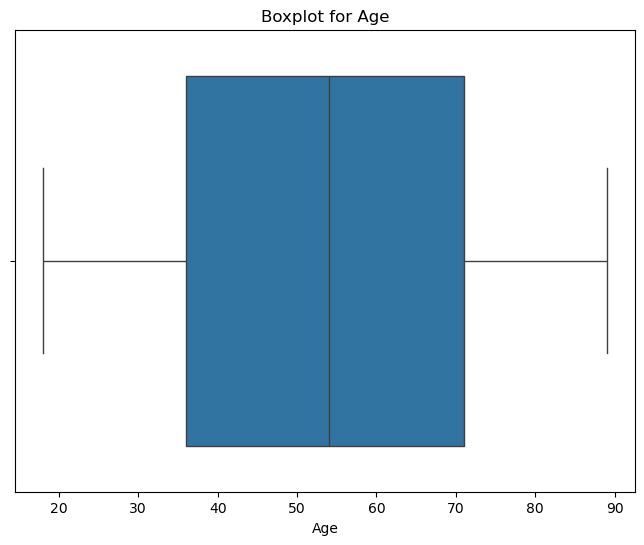

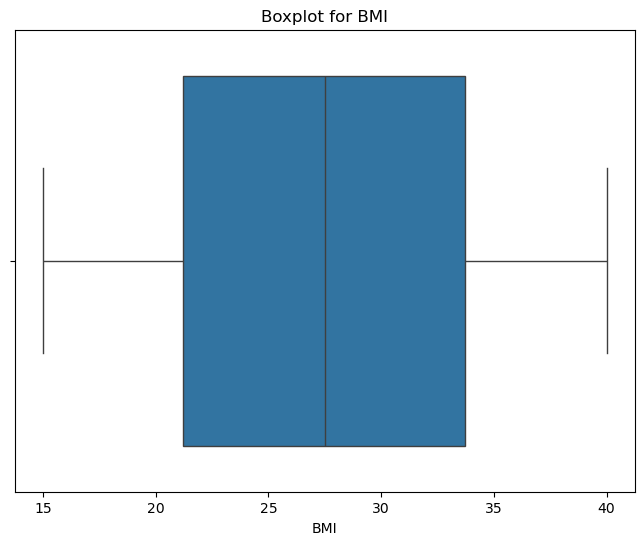

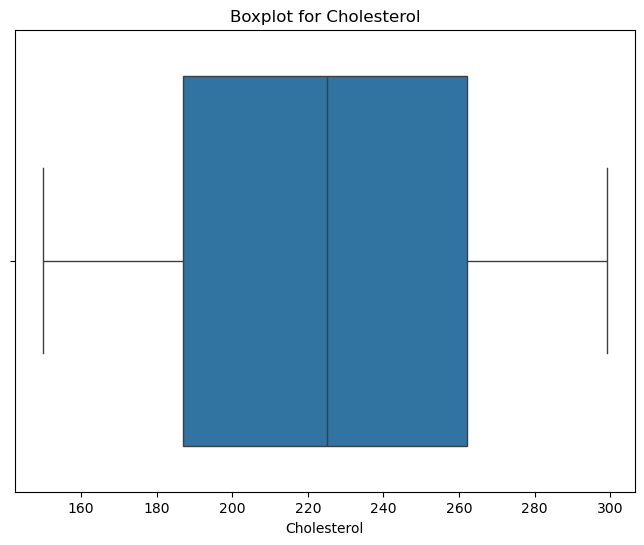

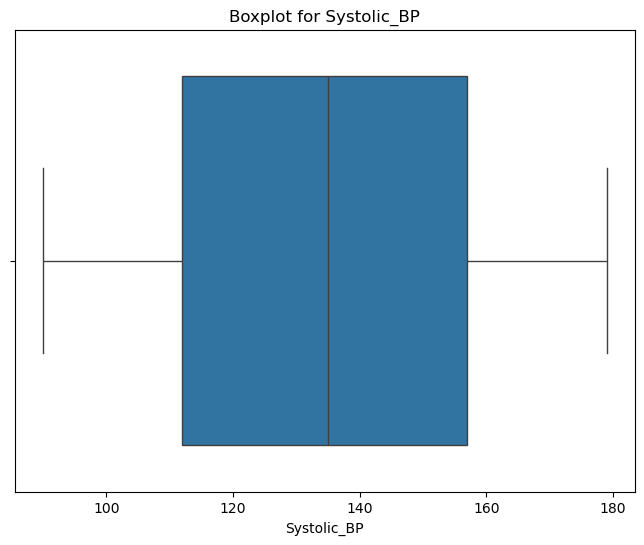

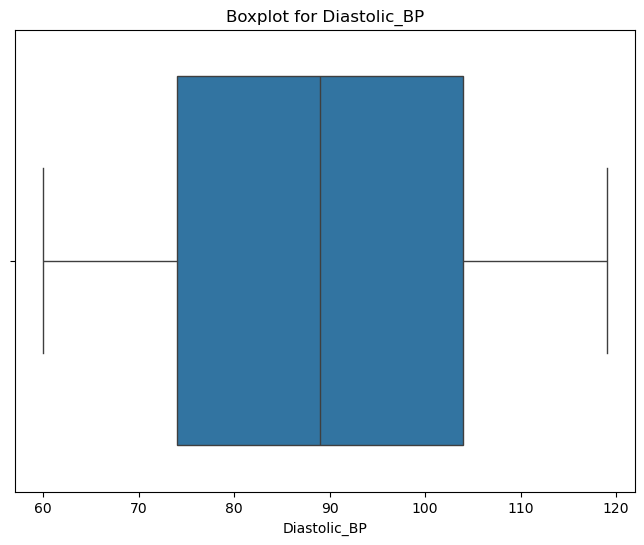

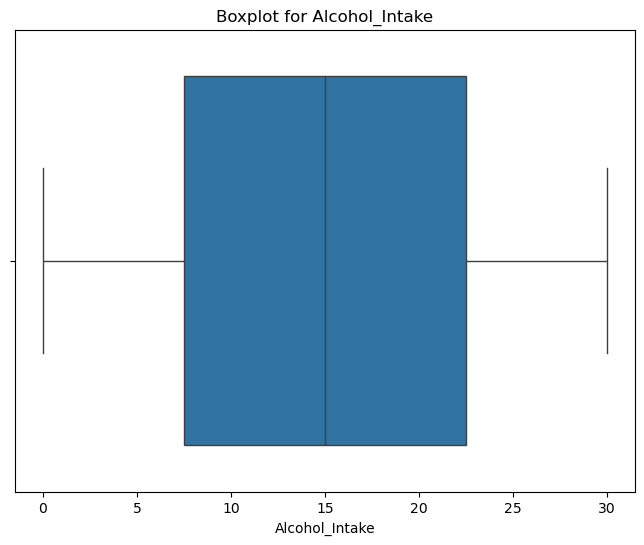

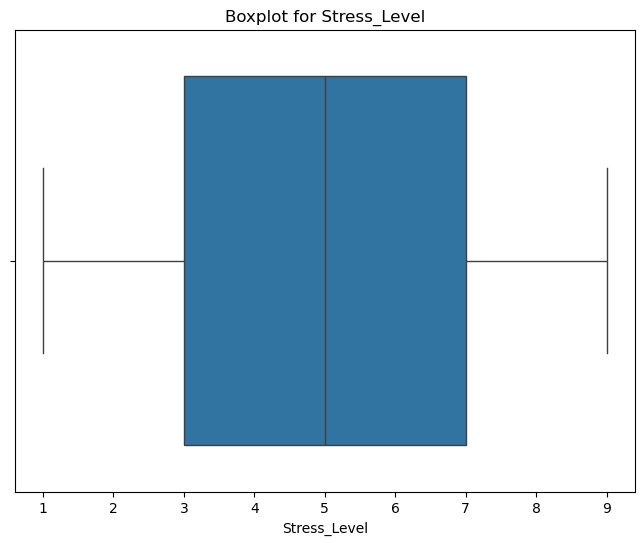

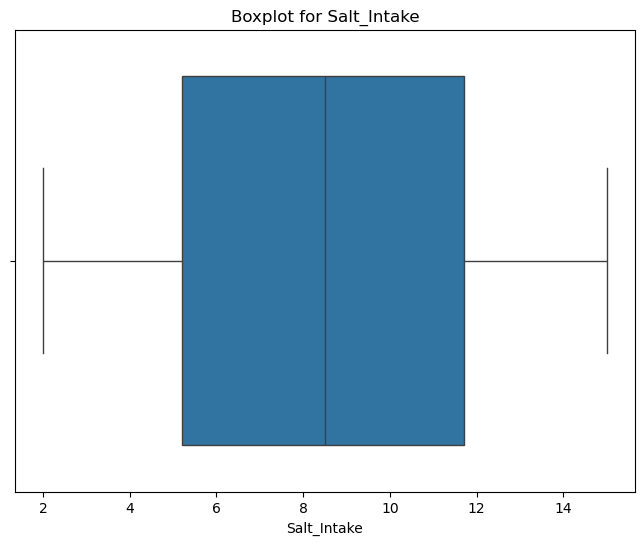

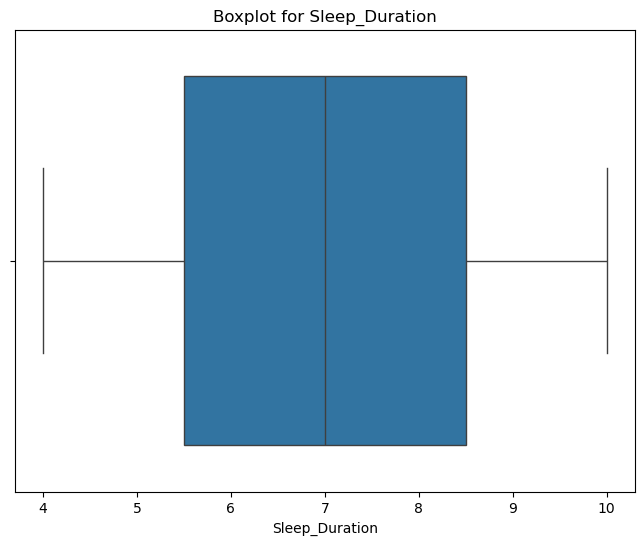

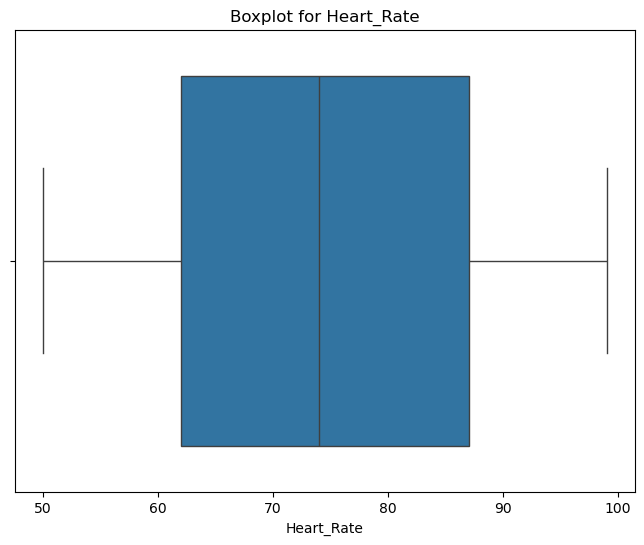

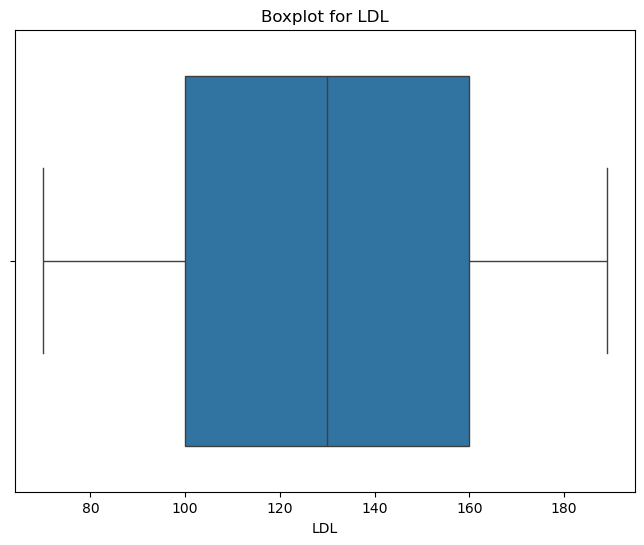

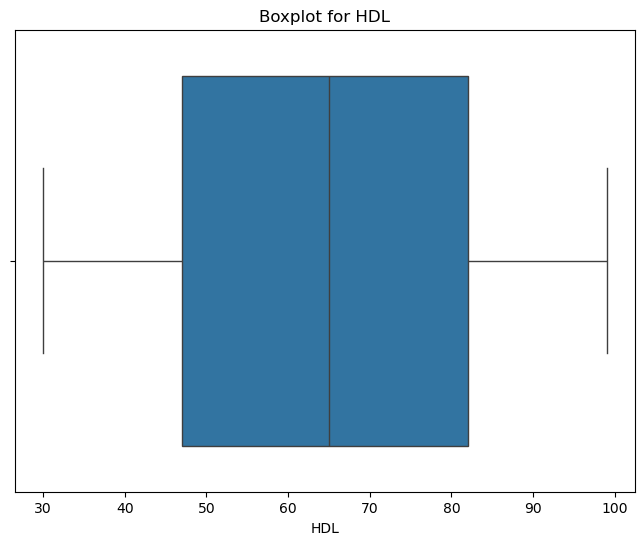

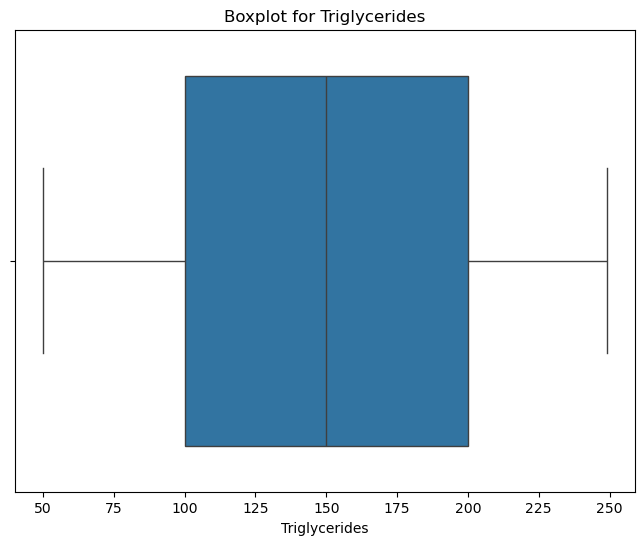

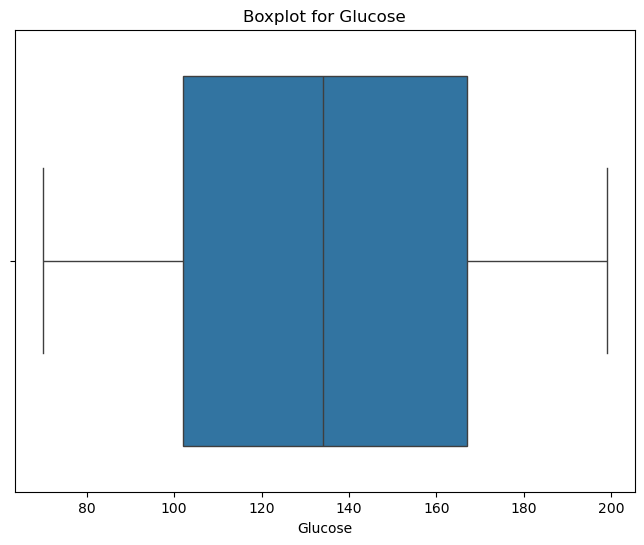

In [74]:
# Visualize outliers using boxplots
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
for col in numerical_columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot for {col}')
    plt.show()

In [75]:
print("Proportion of Hypertension Values")
df['Hypertension'].value_counts(normalize=True)

Proportion of Hypertension Values


Hypertension
High    0.718823
Low     0.281177
Name: proportion, dtype: float64


Feature Extraction

In [76]:
# 1. Create Age Grouping (bins)
bins = [0, 30, 45, 60, 100]
labels = ['Young', 'Middle-Aged', 'Senior', 'Very Senior']
df['Age_Group'] = pd.cut(df['Age'], bins=bins, labels=labels)

# 2. Create BMI Categories (bins)
bmi_bins = [0, 18.5, 24.9, 29.9, 40, 100]
bmi_labels = ['Underweight', 'Normal', 'Overweight', 'Obese', 'Very Obese']
df['BMI_Category'] = pd.cut(df['BMI'], bins=bmi_bins, labels=bmi_labels)

# 3. Create Cholesterol to Age Ratio
df['Cholesterol_to_Age'] = df['Cholesterol'] / df['Age']

# 4. Interaction Features (Systolic_BP * Diastolic_BP)
df['BP_Interaction'] = df['Systolic_BP'] * df['Diastolic_BP']

# 5. Interaction Feature (BMI * Cholesterol)
df['BMI_Cholesterol_Interaction'] = df['BMI'] * df['Cholesterol']

# 6. Polynomial Features for Cholesterol (degree 2)
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2, include_bias=False)
cholesterol_poly = poly.fit_transform(df[['Cholesterol']])

# Convert to DataFrame and add it to the dataset
cholesterol_poly_df = pd.DataFrame(cholesterol_poly, columns=poly.get_feature_names_out(['Cholesterol']))
df = pd.concat([df, cholesterol_poly_df], axis=1)

Feature Scaling

In [77]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])


Correlation Analysis

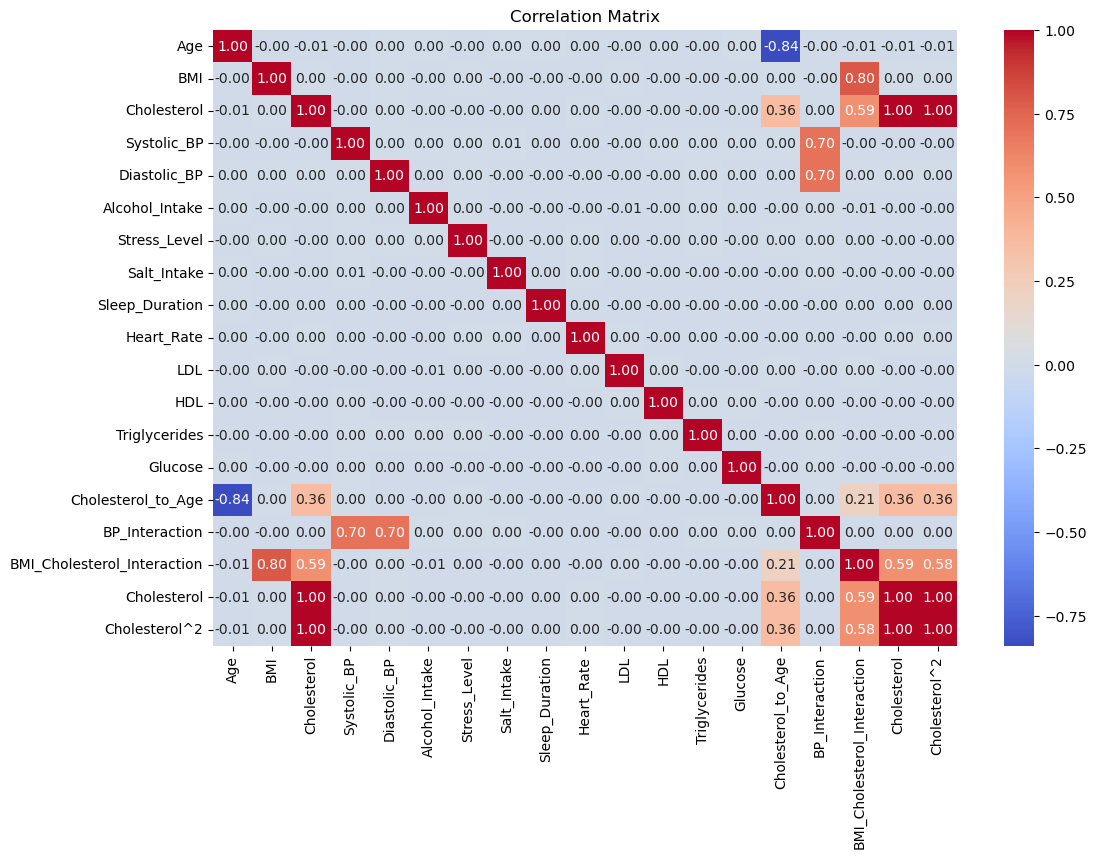

In [78]:
# Select only numerical columns
numerical_columns = df.select_dtypes(include=['float64', 'int64'])

# Compute the correlation matrix
correlation_matrix = numerical_columns.corr()

# Plot the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

# Training the Data


#### Splitting the Data

In [ ]:
from sklearn.model_selection import train_test_split

# Split the data into features (X) and target (y)
X = df.drop('Hypertension', axis=1)  # Drop the target variable
y = df['Hypertension']  # Target variable

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Standardize Features

In [ ]:
from sklearn.preprocessing import StandardScaler

# Select only numerical columns
numerical_columns = X_train.select_dtypes(include=['float64', 'int64']).columns

# Standardize the numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[numerical_columns])
X_test_scaled = scaler.transform(X_test[numerical_columns])

# If you need to reattach the non-numeric columns (e.g., categorical) to the scaled data:
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=numerical_columns, index=X_train.index)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=numerical_columns, index=X_test.index)

# If you want to combine with non-numeric columns later (e.g., one-hot encoded columns), you can do this:
X_train_final = pd.concat([X_train_scaled_df, X_train.drop(columns=numerical_columns)], axis=1)
X_test_final = pd.concat([X_test_scaled_df, X_test.drop(columns=numerical_columns)], axis=1)

#### Perform Chi-Square Test (Categorical)

In [63]:
from scipy.stats import chi2_contingency

# Print column names and their types to debug
print("Column Types in DataFrame:")
print(df.dtypes)

# Iterate over each column in the dataset (after one-hot encoding)
for column in df.columns:
    if column != 'Hypertension':  # Skip the target variable itself
        # Check if the column is categorical (binary after one-hot encoding)
        print(f"Checking column: {column} with dtype {df[column].dtype}")  # Debugging line
        if df[column].dtype in ['int64', 'uint8']:  # Check if the column is integer (binary)
            # Create a contingency table for the binary feature and the target variable
            contingency_table = pd.crosstab(df[column], df['Hypertension'])

            # Perform Chi-Square test
            chi2, p, dof, expected = chi2_contingency(contingency_table)

            # Check p-value to determine if the feature is statistically significant
            if p < 0.05:
                print(f"The feature '{column}' is important (p < 0.05).")
            else:
                print(f"The feature '{column}' is not significant (p >= 0.05).")

Column Types in DataFrame:
Country                          object
Age                             float64
BMI                             float64
Cholesterol                     float64
Systolic_BP                     float64
Diastolic_BP                    float64
Smoking_Status                   object
Alcohol_Intake                  float64
Physical_Activity_Level          object
Family_History                   object
Diabetes                         object
Stress_Level                    float64
Salt_Intake                     float64
Sleep_Duration                  float64
Heart_Rate                      float64
LDL                             float64
HDL                             float64
Triglycerides                   float64
Glucose                         float64
Gender                           object
Education_Level                  object
Employment_Status                object
Hypertension                     object
Age_Group                      category
BMI_Category 

AttributeError: 'DataFrame' object has no attribute 'dtype'

####  Perform Statistical Tests (Continuous)

In [59]:
from scipy.stats import f_oneway, kruskal

# Function to perform ANOVA for continuous variables
def anova_test(column, target):
    # Group data by target categories
    groups = [column[target == category] for category in target.unique()]
    
    # Perform ANOVA (F-test)
    stat, p = f_oneway(*groups)
    
    # Return the p-value
    return p

# Function to perform Kruskal-Wallis for non-normally distributed continuous variables
def kruskal_test(column, target):
    # Group data by target categories
    groups = [column[target == category] for category in target.unique()]
    
    # Perform Kruskal-Wallis test
    stat, p = kruskal(*groups)
    
    # Return the p-value
    return p

# Iterate over each column to check for continuous variables
for column in df.select_dtypes(include=['float64', 'int64']).columns:  # Select only continuous columns
    if column != 'Hypertension':  # Skip the target variable
        # Perform ANOVA or Kruskal-Wallis test based on the distribution
        p_value = None
        skew_value = df[column].skew()  # Get the skewness of the column
        
        # Ensure skew_value is scalar (only one value for each column)
        if isinstance(skew_value, float):  # Check that skew_value is a scalar
            # Check if skewness is less than 1, indicating normal distribution
            if abs(skew_value) < 1:  # If skew is not high, assume normal distribution for ANOVA
                p_value = anova_test(df[column], df['Hypertension'])
                test_type = "ANOVA"
            else:
                p_value = kruskal_test(df[column], df['Hypertension'])
                test_type = "Kruskal-Wallis"
        
            # Check p-value to determine if the feature is statistically significant
            if p_value < 0.05:
                print(f"The feature '{column}' is important using {test_type} (p < 0.05).")
            else:
                print(f"The feature '{column}' is not significant using {test_type} (p >= 0.05).")
        else:
            print(f"Skewness value for '{column}' is not a scalar. Skipping the test.")

The feature 'Age' is not significant using ANOVA (p >= 0.05).
The feature 'BMI' is not significant using ANOVA (p >= 0.05).
Skewness value for 'Cholesterol' is not a scalar. Skipping the test.
The feature 'Systolic_BP' is not significant using ANOVA (p >= 0.05).
The feature 'Diastolic_BP' is not significant using ANOVA (p >= 0.05).
The feature 'Alcohol_Intake' is not significant using ANOVA (p >= 0.05).
The feature 'Stress_Level' is not significant using ANOVA (p >= 0.05).
The feature 'Salt_Intake' is not significant using ANOVA (p >= 0.05).
The feature 'Sleep_Duration' is not significant using ANOVA (p >= 0.05).
The feature 'Heart_Rate' is not significant using ANOVA (p >= 0.05).
The feature 'LDL' is not significant using ANOVA (p >= 0.05).
The feature 'HDL' is not significant using ANOVA (p >= 0.05).
The feature 'Triglycerides' is not significant using ANOVA (p >= 0.05).
The feature 'Glucose' is not significant using ANOVA (p >= 0.05).
The feature 'Cholesterol_to_Age' is not signific

#### Train the Model

In [ ]:
from sklearn.linear_model import LogisticRegression

# Initialize the logistic regression model
model = LogisticRegression()

# Train the model on the training data
model.fit(X_train_scaled, y_train)


#### Evaluate the Model

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

# Evaluate the model's performance
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Monte Carlo Simulation for Model Evaluation

#### Monte Carlo Simulation Process

In [ ]:
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Number of simulations
n_iterations = 100
accuracy_scores = []

# Initialize the scaler
scaler = StandardScaler()

# Logistic Regression model
model = LogisticRegression()

# Assuming 'X' is your feature set and 'y' is your target variable
for _ in range(n_iterations):
    # Randomly split the data
    X_train_mc, X_test_mc, y_train_mc, y_test_mc = train_test_split(X, y, test_size=0.2, random_state=np.random.randint(100))

    # Identify numerical columns
    numerical_columns = X_train_mc.select_dtypes(include=['float64', 'int64']).columns
    
    # Apply scaling to numerical columns and one-hot encoding to categorical columns
    column_transformer = ColumnTransformer(
        transformers=[
            ('num', StandardScaler(), numerical_columns),
            ('cat', OneHotEncoder(), X_train_mc.select_dtypes(include=['object']).columns)
        ])

    # Fit and transform the training data and transform the test data
    X_train_transformed = column_transformer.fit_transform(X_train_mc)
    X_test_transformed = column_transformer.transform(X_test_mc)
    
    # Train the logistic regression model
    model.fit(X_train_transformed, y_train_mc)
    
    # Make predictions and evaluate the accuracy
    y_pred_mc = model.predict(X_test_transformed)
    accuracy_scores.append(accuracy_score(y_test_mc, y_pred_mc))

# Analyze the results
mean_accuracy = np.mean(accuracy_scores)
std_accuracy = np.std(accuracy_scores)

print(f"Mean Accuracy: {mean_accuracy:.4f}")
print(f"Standard Deviation of Accuracy: {std_accuracy:.4f}")